In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # images
from astropy.io import fits # astro images
from collections import Counter

%matplotlib inline

/Users/sosnovik/Anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
def unpack(path):
    """
    General method for image unpacking
    """
    data = fits.getdata(path)
    return data

def show_photo(data, size=(6,8)):
    """
    Show photo or image in grayscale
    """
    plt.figure(figsize=size)
    plt.imshow(data, cmap='gray')
    plt.show()

In [3]:
paths = [
    "12-07-2014 4_11_07_Black_proc.fit",
    "30-06-2014 2_56_17_Black_proc.fit",
    "30-06-2014 3_06_23_Black_proc.fit",
    "30-06-2014 3_16_23_Black_proc.fit"
]
paths = ["black_frames/" + path_ for path_ in paths]
images = [unpack(path) for path in paths] # list of images

In [54]:
def get_indices(data, mode="min"):
    rows, columns = np.where(data == data.min())
    if mode == "max":
        rows, columns = np.where(data == data.max())
    pixels = []
    for i in xrange(rows.shape[0]):
        pixels.append((rows[i], columns[i]))
    return pixels



In [87]:
def join(list_):
    new = []
    for item in list_:
        new.extend(item)
    return new

def dublicates(list_):
    return [item for item, count in Counter(list_).items() if count > 1]

def intersection(a,b):
    return [x for x in b if x in a]

def bugs(images):
    min_indices = []
    max_indices = []
    for image in images:
        im_min_indeces = get_indices(image)
        min_indices.append(im_min_indeces)
        im_max_indeces = get_indices(image, mode="max")
        max_indices.append(im_max_indeces)
    
    min_ = join(min_indices)
    max_ = join(max_indices)
    min_dubs = dublicates(min_)
    max_dubs = dublicates(max_)
    
    print max_dubs
    print min_dubs

In [91]:
bugs(images)

[(2214, 3019)]
[]


In [92]:
[item for item, count in Counter(a).items() if count > 1]

[(2214, 3019)]

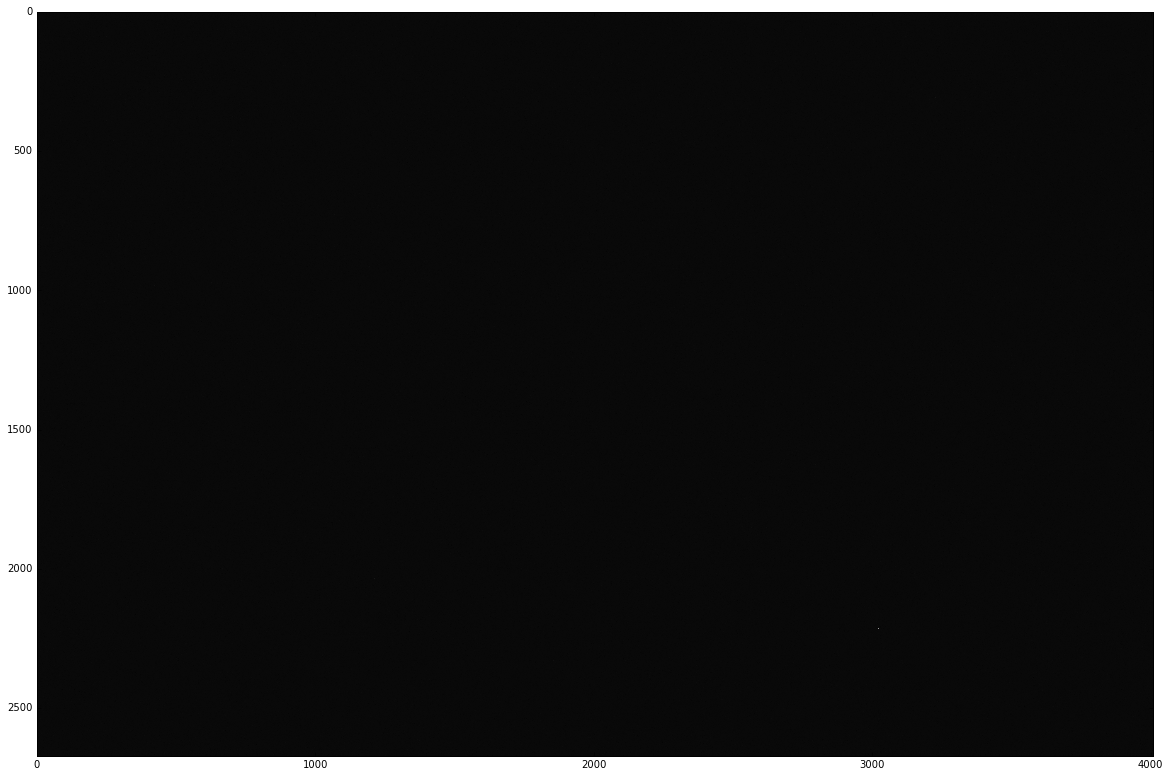

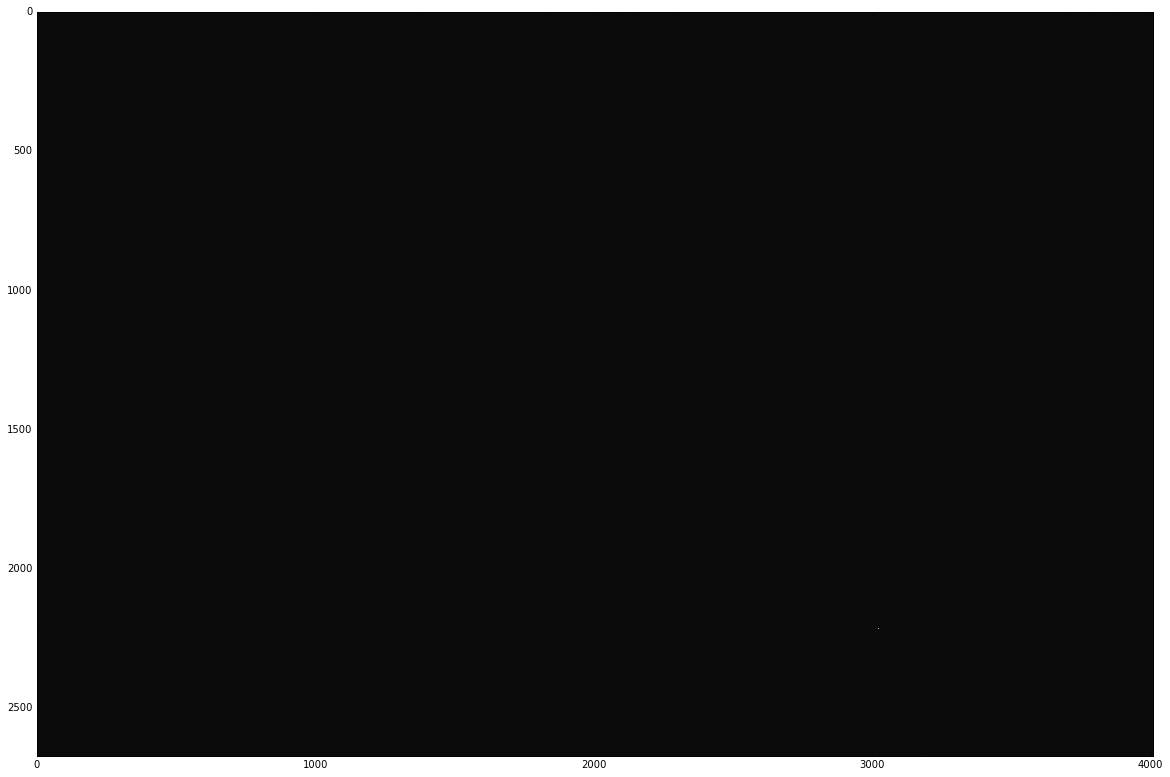

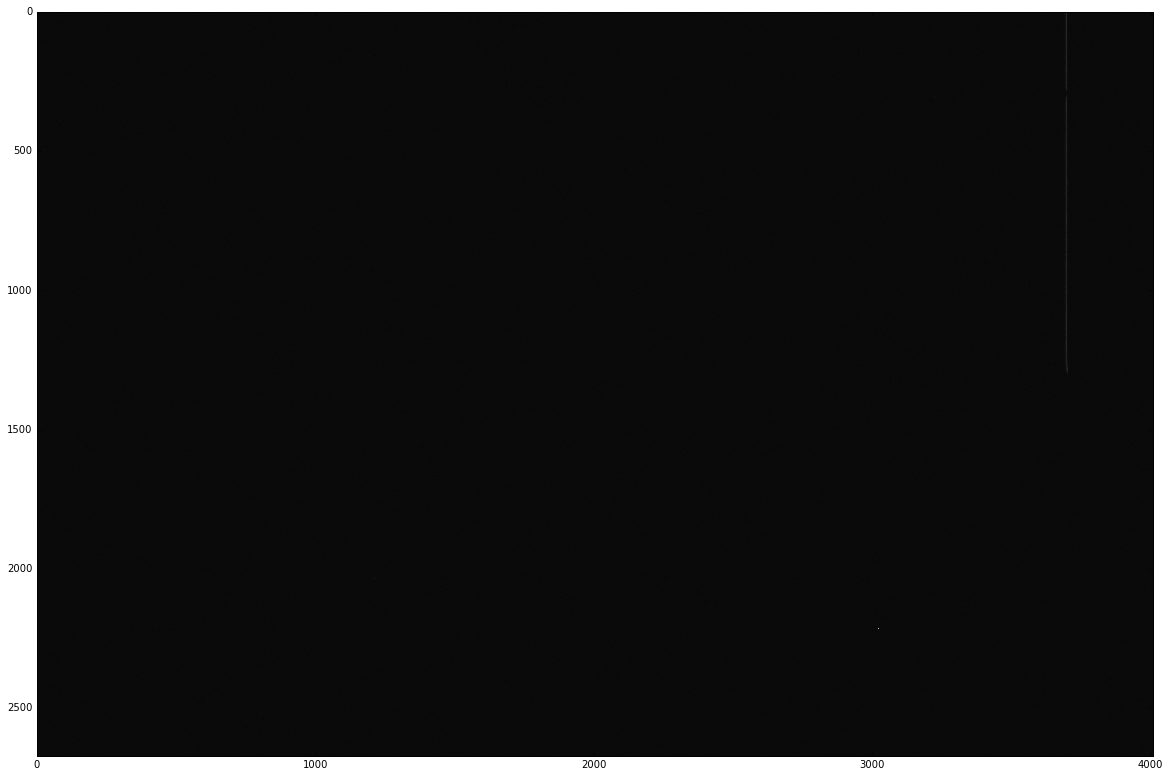

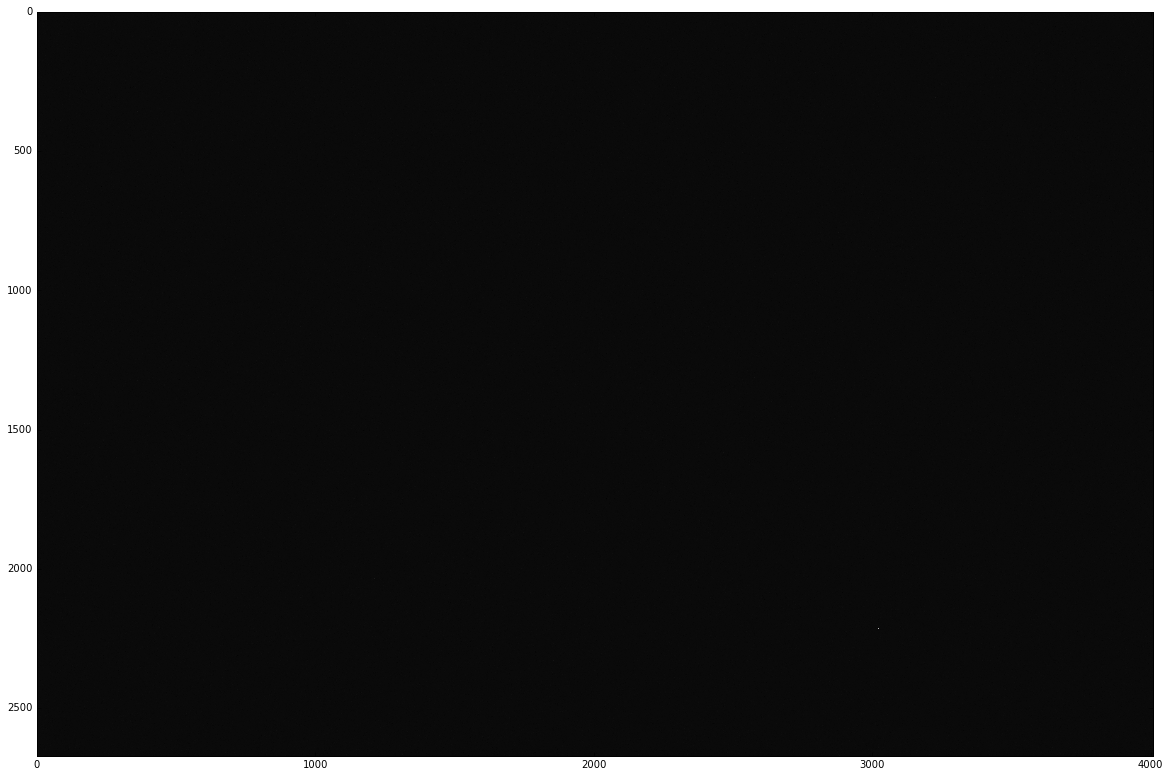

In [7]:
for photo in images:
    #show_photo(photo)
    mean = photo.mean()
    std = photo.std()
    max_ = mean+1*std
    min_ = mean-1*std
    photo_ = photo.copy()
    photo_[photo_ >= max_] = max_
    photo_[photo_ <= min_] = min_
    show_photo(photo - photo_, size=(20,20))

In [1]:
a = 123

In [3]:
b = [a]*10

In [4]:
b

[123, 123, 123, 123, 123, 123, 123, 123, 123, 123]